Load data from http://media.wiley.com/product_ancillary/6X/11186614/DOWNLOAD/ch08.zip, SwordForecasting.xlsx

In [50]:
# code written in py_3.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Load sales time-series data

In [44]:
# find path to your SwordForecasting.xlsx
df_sales = pd.read_excel(open('C:/Users/craigrshenton/Desktop/Dropbox/excel_data_sci/ch08/SwordForecasting.xlsm','rb'), sheetname=0)
df_sales = df_sales.iloc[0:36, 0:2]
df_sales.rename(columns={'t':'Time'}, inplace=True)
df_sales.head()

,Time,Demand
0,1,165.0
1,2,171.0
2,3,147.0
3,4,143.0
4,5,164.0


In [45]:
df_sales.Time = pd.date_range('2010-1', periods=len(df_sales.Time), freq='M') # 'Time' is now in time-series format
df_sales = df_sales.set_index('Time') # set Time as Series index

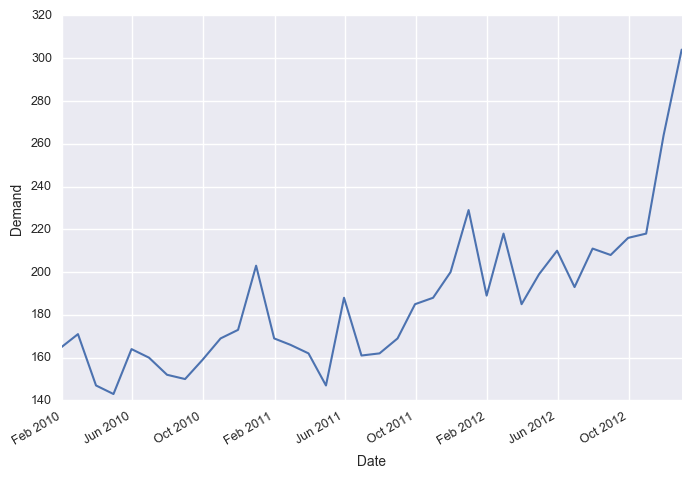

In [76]:
sns.set(style="darkgrid", context="notebook", font_scale=0.9, rc={"lines.linewidth": 1.5}) # make plots look nice

fig, ax = plt.subplots(1)
ax.plot(df_sales)
plt.ylabel('Demand')
plt.xlabel('Date')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.show()

Following Aarshay Jain over at Analytics Vidhya (see [here](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)) we implement a Rolling Mean, Standard Deviation + Dickey-Fuller test

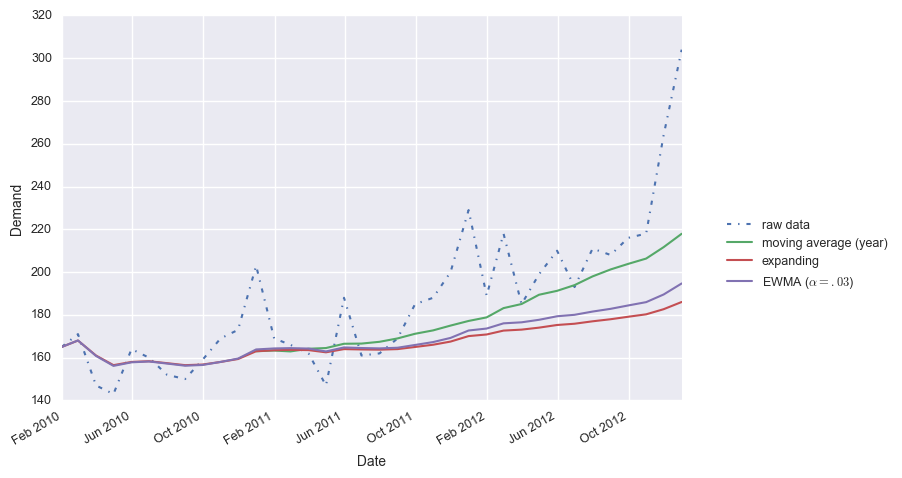

Results of Dickey-Fuller Test:
Test Statistic                  2.189225
p-value                         0.998874
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (10%)           -2.632800
Critical Value (5%)            -2.986489
dtype: float64


In [77]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):

    fig, ax = plt.subplots(1)
    ax.plot(timeSeries, '-.', label='raw data')
    ax.plot(timeSeries.rolling(12).mean(), label='moving average (year)')
    ax.plot(timeSeries.expanding().mean(), label='expanding')
    ax.plot(timeSeries.ewm(alpha=0.03).mean(), label='EWMA ($\\alpha=.03$)')

    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()
    
    plt.ylabel('Demand')
    plt.xlabel('Date')
    plt.legend(bbox_to_anchor=(1.35, .5))
    plt.show()
    
    # perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeSeries.ix[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df_sales)

In [161]:
def tsplot(y, lags=None, figsize=(10, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [170]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

mod = smt.ARIMA(df_sales, order=(1, 1, 1))
res = mod.fit()

In [181]:
pred_dy = res.get_prediction(start=min(df_sales.index), dynamic=min(df_sales.index))
pred_dy_ci = pred_dy.conf_int()

AttributeError: 'ARIMAResults' object has no attribute 'get_prediction'